Julian Andres Thomas and Pablo Domínguez

# **PORTFOLIO CONSTRUCTION UNDER MACROECONOMIC UNCERTAINTY**

In [167]:
import numpy as np
import pandas as pd
import yfinance as yf
import cvxpy as cp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import missingno as msno

**ASSET ALLOCATION**

* **Supermarkets:** Costco, Walmart, and Kroger. There will always be demand for essential goods, making it not very sensitive to price changes.

* **Healthcare:** Eli Lilly and Company (pharmaceutical), AbbVie (pharmaceutical), UnitedHealth Group (insurance): In a recession, we believe that society would not stop consuming pharmaceuticals, and the idea of canceling an insurance subscription in the United States—where hospital costs are much higher than in most countries—is very unlikely.

* **Defense and Security:** Lockheed Martin: we believe that due to political reasons and rising geopolitical tensions, its demand would increase. Moreover, a large part (70%) of its revenues comes from the U.S. Department of Defense, purchasing F-35 jets, helicopters, or missiles. Additionally, a 12% increase in defense spending is expected.

* **Tobacco:** As it is an addictive substance, it is unlikely that its price will fall drastically.






In [168]:
tickers = ["WMT", "COST", "KR", "LMT", "LLY", "ABBV", "UNH", "MO"]

In [169]:
prices = yf.download(tickers, start = "2019-1-1", end = "2023-12-31", multi_level_index= False, auto_adjust = False)['Adj Close']
prices

[*********************100%***********************]  8 of 8 completed


Ticker,ABBV,COST,KR,LLY,LMT,MO,UNH,WMT
Date,,,,,,,,
2019-01-02,66.900146,185.902435,23.719419,104.899406,224.121124,30.135330,221.528564,28.147161
2019-01-03,64.695900,181.962112,23.762873,101.639542,218.491241,29.970320,215.487442,28.002407
2019-01-04,66.780197,187.246094,24.032204,104.698517,224.383591,30.740356,218.007614,28.177320
2019-01-07,67.754875,187.936066,24.258106,105.264648,226.957275,29.811424,218.426163,28.509022
2019-01-08,68.069771,189.343353,24.727285,106.232552,228.472748,29.982538,221.346619,28.708052
...,...,...,...,...,...,...,...,...
2023-12-22,146.723526,651.285156,43.679214,564.559143,433.584503,36.509884,510.109131,51.332783
2023-12-26,146.420502,654.213928,43.756626,564.836304,435.480530,36.491791,509.834656,51.254139
2023-12-27,146.666718,661.335022,43.746956,575.565491,434.310059,36.347054,512.540527,51.735840


<Axes: >

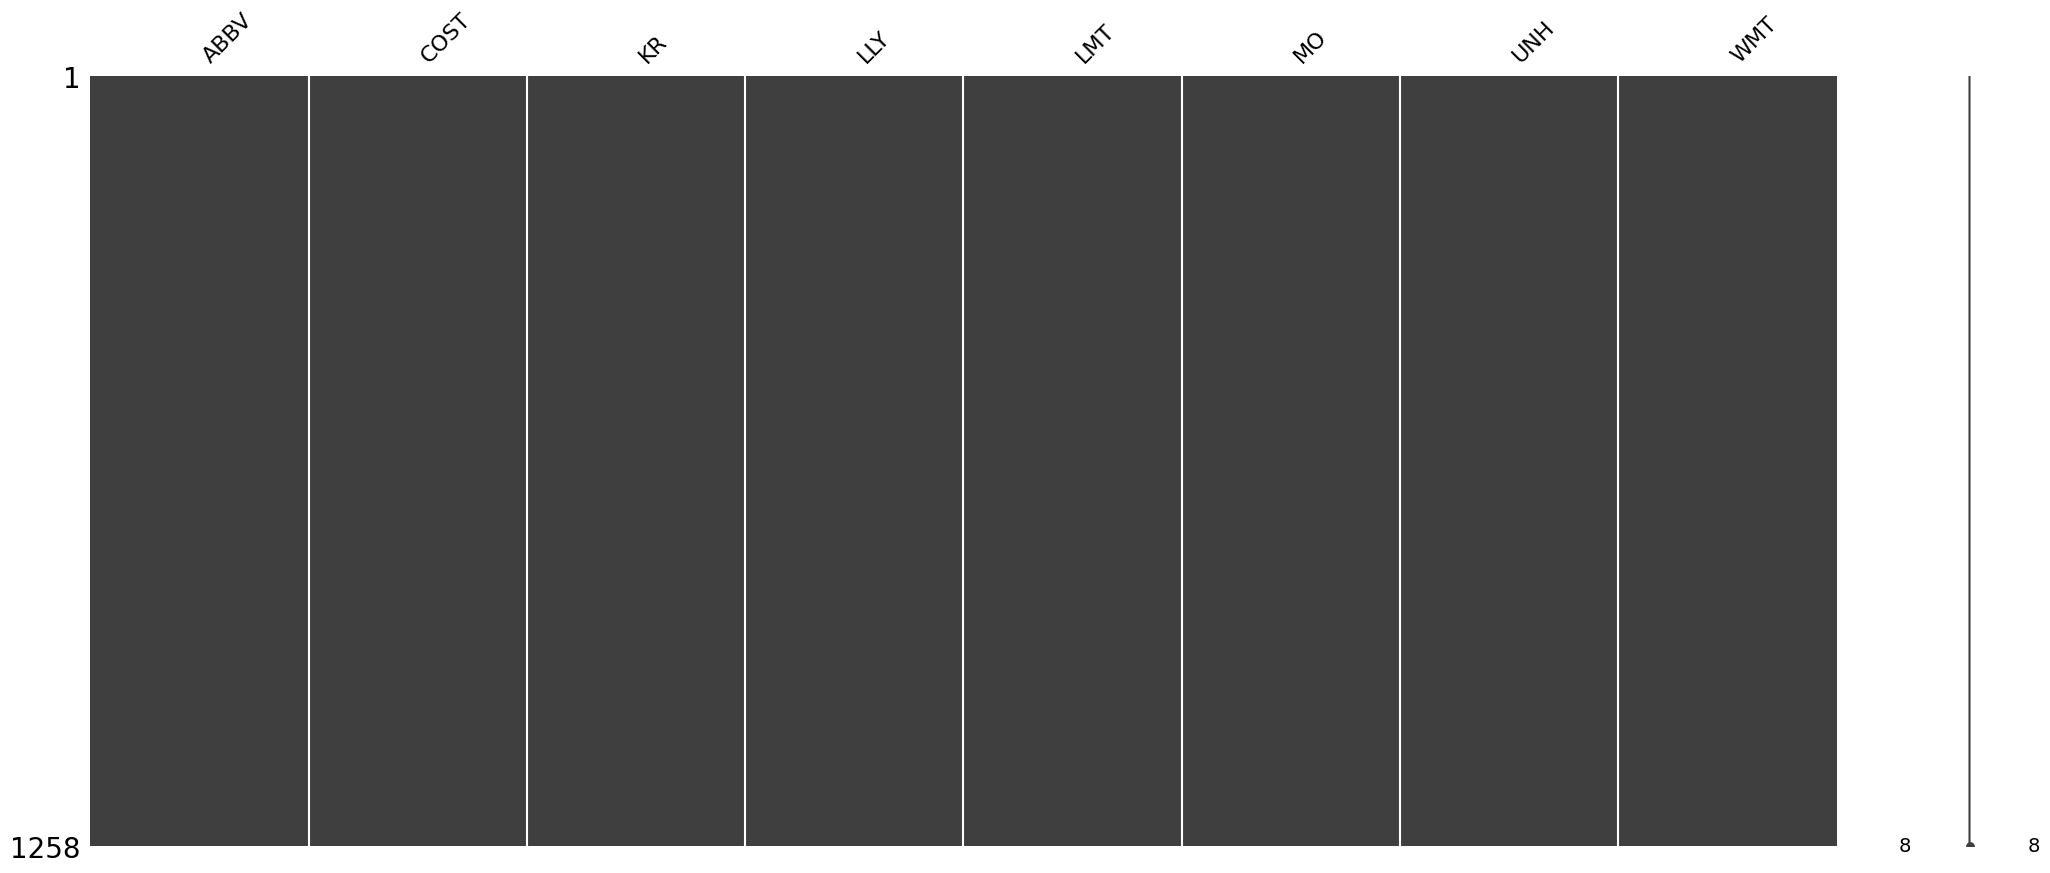

In [170]:
msno.matrix(prices)

In [171]:
weekly_prices = prices.resample("W-WED").first()
weekly_prices

Ticker,ABBV,COST,KR,LLY,LMT,MO,UNH,WMT
Date,,,,,,,,
2019-01-02,66.900146,185.902435,23.719419,104.899406,224.121124,30.135330,221.528564,28.147161
2019-01-09,64.695900,181.962112,23.762873,101.639542,218.491241,29.970320,215.487442,28.002407
2019-01-16,66.127914,191.240921,24.744663,105.867302,234.932251,29.860312,222.784119,28.635675
2019-01-23,66.180031,191.985382,25.135641,108.807571,236.032867,28.760263,236.340134,29.172445
2019-01-30,65.178223,190.941315,24.944490,104.999847,241.493393,26.480707,242.126572,29.660967
...,...,...,...,...,...,...,...,...
2023-12-06,134.839066,574.810547,42.837368,584.998047,433.149261,37.151459,540.285706,50.829418
2023-12-13,140.123154,592.469788,43.350216,582.256470,432.510742,36.515186,537.520996,49.959755
2023-12-20,146.666718,611.700012,42.179375,567.805664,430.730835,37.213322,523.765991,49.864727


In [172]:
weekly_returns = np.log(weekly_prices).diff().dropna()
cov_matrix = retornos.cov()

In [173]:
average_returns = weekly_returns.mean().to_numpy()
cov_matrix = weekly_returns.cov().to_numpy()

In [174]:
num_assets = len(prices.columns)
num_assets

8

We opted to optimize the portfolio by maximizing profitability, subject to the constraint that each asset must represent at least 5% of the portfolio. This prevents the allocation from being overly concentrated in the asset with the highest return


In [175]:
weights = cp.Variable(num_assets)
risk = cp.quad_form(weights, cov_matrix)

In [176]:
returns = weights @ average_returns

In [177]:
constraints = [cp.sum(weights) == 1,
               weights >= 0.05
               ]

In [178]:
objective = cp.Maximize(returns)
problem = cp.Problem(objective, constraints)
result = problem.solve()
optimal_weights = weights.value

In [179]:
optimal_weights

array([0.05000001, 0.05      , 0.05      , 0.64999997, 0.05000001,
       0.05      , 0.05000001, 0.05      ])

In [180]:
portfolio_returns = (optimal_weights @ average_returns)* (52)
portfolio_std = np.sqrt(risk.value*52)
portfolio = (portfolio_returns, portfolio_std)
print(portfolio)

(np.float64(0.2697449534921553), np.float64(0.2202550203092898))


In [181]:
portfolio_weekly_returns = optimal_weights @ weekly_returns.T

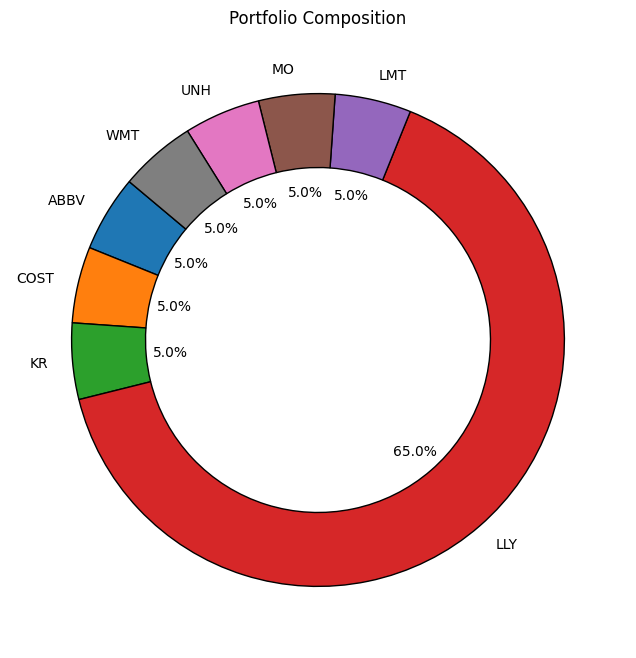

In [182]:
plt.figure(figsize=(8, 8))

plt.pie(optimal_weights, labels = prices.columns, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

plt.title('Portfolio Composition')

plt.show()

# **INDICATORS ESTIMATION**

PORTFOLIO'S BETA AGAINST SP500

In [183]:
prices_sp500 = yf.download("^GSPC", start="2019-01-01", end="2023-12-31", multi_level_index = False, auto_adjust = False)["Adj Close"]
weekly_prices_sp500 = prices_sp500.resample("W-WED").first()
weekly_returns_sp500 = np.log(weekly_prices_sp500).diff().dropna()

[*********************100%***********************]  1 of 1 completed


In [184]:
beta_data = pd.concat([weekly_returns_sp500, portfolio_weekly_returns], join = 'inner', axis = 1)
beta_data.columns = ['SP500 returns', 'Portfolio weekly returns']
beta_data.head()

,SP500 returns,Portfolio weekly returns
Date,,
2019-01-09,-0.025068,-0.026362
2019-01-16,0.058992,0.038323
2019-01-23,0.015029,0.021063
2019-01-30,0.002414,-0.025517
2019-02-06,0.023108,0.030679


In [185]:
X = beta_data['SP500 returns']
y = beta_data['Portfolio weekly returns']
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.194
Model:                                  OLS   Adj. R-squared:                  0.190
Method:                       Least Squares   F-statistic:                     62.14
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):           8.91e-14
Time:                              09:02:40   Log-Likelihood:                 568.75
No. Observations:                       261   AIC:                            -1133.
Df Residuals:                           259   BIC:                            -1126.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

We can see that the S&P 500 returns explain 19.4% of our portfolio's returns, which is not high. However, we observe an additional return generated by our fund of 0.4%, and a beta of 0.49. This means that when the index moves by 1%, our fund is expected to move by approximately 0.5%—half as much.

EXPOSITION ANALYSIS against Fama and French Factors.

In [186]:
dateparse = lambda x: pd.to_datetime(x, format="%Y%m%d")
factors = pd.read_csv("/content/F-F_Research_Data_Factors_daily.CSV", skiprows = 4, nrows = 25907-6 ,index_col=0, parse_dates=True, date_parser = dateparse)

<ipython-input-186-68debf804bb6>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pd.read_csv("/content/F-F_Research_Data_Factors_daily.CSV", skiprows = 4, nrows = 25907-6 ,index_col=0, parse_dates=True, date_parser = dateparse)


In [187]:
factors = factors/100
factors

,Mkt-RF,SMB,HML,RF
1926-07-01,0.0010,-0.0025,-0.0027,0.00009
1926-07-02,0.0045,-0.0033,-0.0006,0.00009
1926-07-06,0.0017,0.0030,-0.0039,0.00009
1926-07-07,0.0009,-0.0058,0.0002,0.00009
1926-07-08,0.0021,-0.0038,0.0019,0.00009
...,...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0005,0.00017
2024-12-26,0.0002,0.0104,-0.0019,0.00017
2024-12-27,-0.0117,-0.0066,0.0056,0.00017
2024-12-30,-0.0109,0.0012,0.0074,0.00017


In [188]:
price_factors = np.exp(factors.cumsum())
weekly_price_factors = price_factors.resample("W-WED").first()
factor_returns = np.log(weekly_price_factors).diff().dropna()

In [189]:
weekly_portfolio_returns = beta_data['Portfolio weekly returns']
data_ff = pd.concat([factor_returns, weekly_portfolio_returns], join = 'inner', axis = 1)
data_ff.head()

,Mkt-RF,SMB,HML,RF,Portfolio weekly returns
2019-01-09,-0.0135,0.0164,0.0212,0.00042,-0.026362
2019-01-16,0.0648,0.0243,-0.0244,0.00050,0.038323
2019-01-23,0.0148,-0.0033,0.0095,0.00050,0.021063
2019-01-30,0.0014,-0.0071,0.0030,0.00040,-0.025517
2019-02-06,0.0234,0.0026,-0.0157,0.00050,0.030679


In [190]:
X = data_ff[["Mkt-RF", "SMB", "HML"]]
Y = data_ff.loc[:, "Portfolio weekly returns"] - data_ff["RF"]

X_sm = sm.add_constant(X)

modelo = sm.OLS(Y, X_sm).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           2.48e-13
Time:                        09:02:40   Log-Likelihood:                 571.93
No. Observations:                 261   AIC:                            -1136.
Df Residuals:                     257   BIC:                            -1122.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.002      1.952      0.0

We can see that the factors explain 20.4% of the portfolio's returns. Our portfolio has a market beta of 0.53 and an SMB of -0.31, indicating that it tends to behave like a large-cap entity.

SECTOR FACTOR ANALYSIS. For the health factor, we have missing data from 1923 to 1969, so we will exclude data prior to that period.

In [191]:
sector_factors = pd.read_csv("/content/49_Industry_Portfolios_Daily.csv", skiprows = 9 ,
                      nrows = 25911-10, parse_dates = True, index_col = 0, date_parser = dateparse)

<ipython-input-191-f8fd516f91cb>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sector_factors = pd.read_csv("/content/49_Industry_Portfolios_Daily.csv", skiprows = 9 ,


In [192]:
sector_factors = sector_factors[['Rtail', 'Hlth ', 'Drugs', 'Aero ', 'Smoke']]


In [193]:
sector_factors.replace(-99.99, np.nan, inplace=True)

<Axes: >

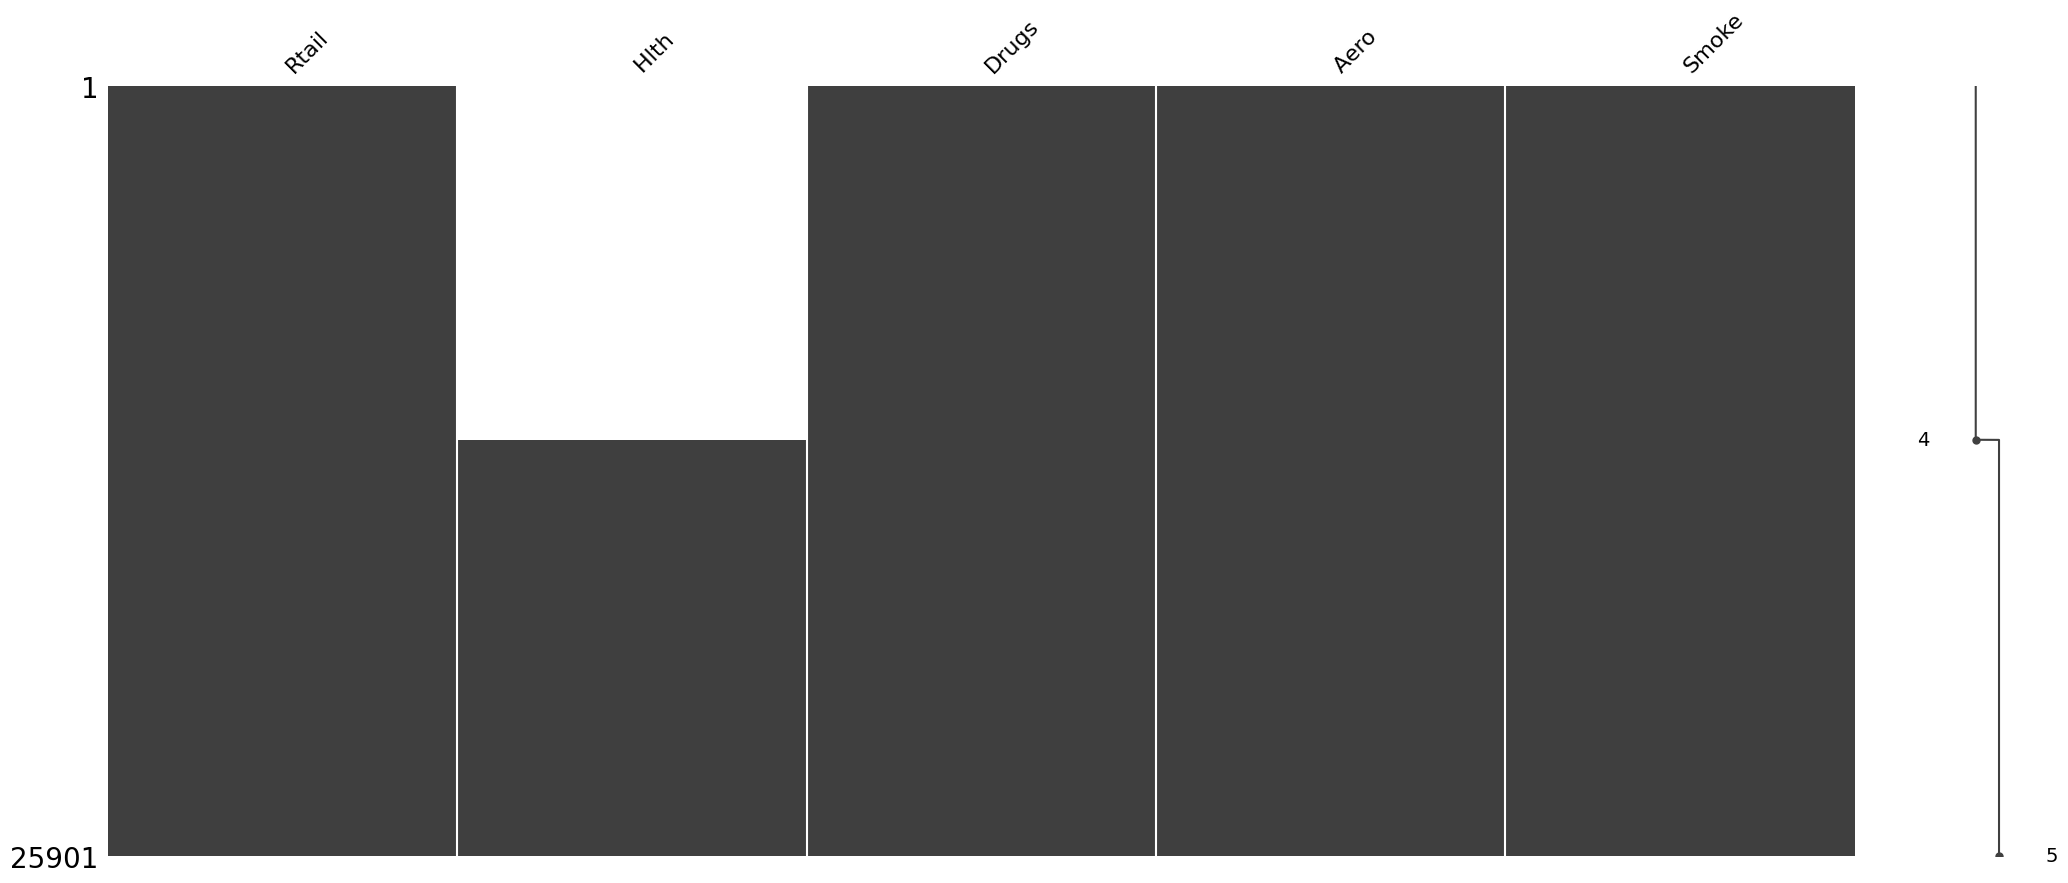

In [194]:
msno.matrix(sector_factors)

<Axes: >

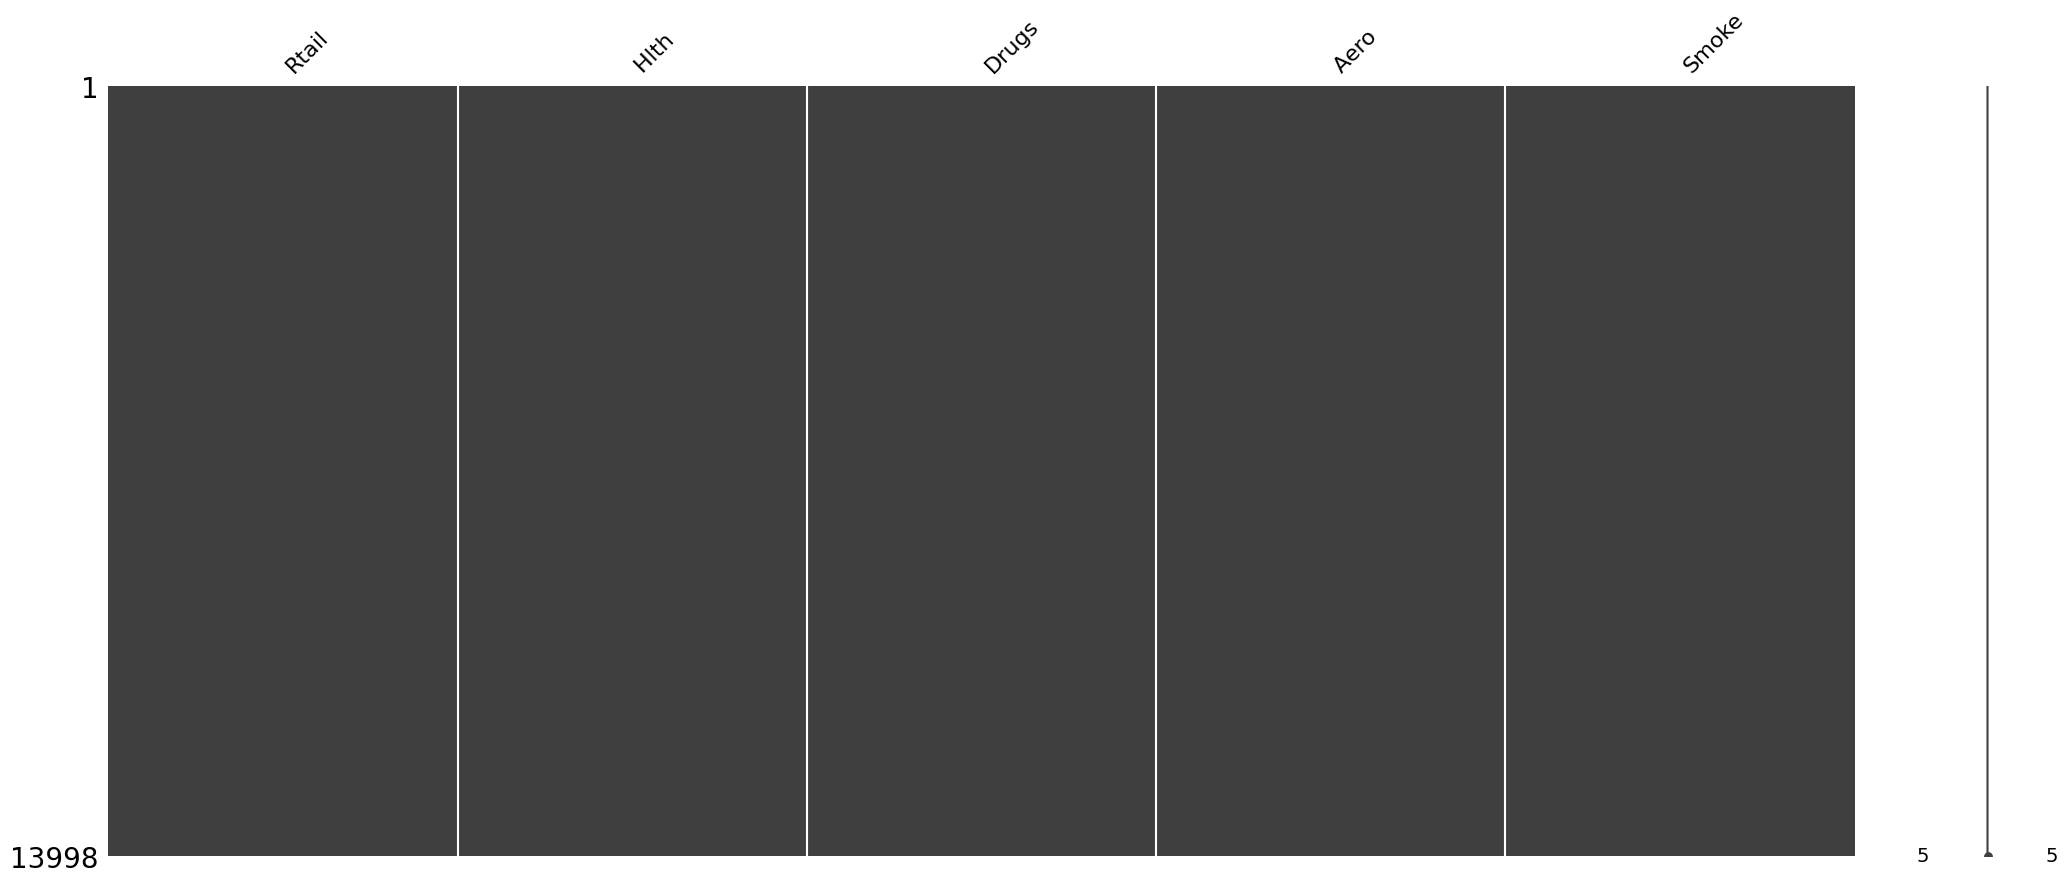

In [195]:
sector_factors = sector_factors.dropna(axis = 0, how = 'any')
msno.matrix(sector_factors)

In [196]:
sector_factors = sector_factors / 100
price_sector_factors = np.exp(sector_factors.cumsum()) #we convert to prices to later resample and obtain the sectorial factors returns.

In [197]:
price_sector_factors

,Rtail,Hlth,Drugs,Aero,Smoke
1969-07-01,1.004410,0.991040,1.006622,0.999200,1.008435
1969-07-02,1.005214,1.023471,1.013490,1.004108,1.018061
1969-07-03,1.006521,1.006924,1.021937,1.005515,1.017858
1969-07-07,1.001301,0.972583,1.019487,0.988072,1.015215
1969-07-08,0.988566,1.001701,1.006722,0.971319,1.001501
...,...,...,...,...,...
2024-12-24,1628.639040,324.666986,1290.777463,1960.784643,10638.130047
2024-12-26,1624.572527,325.414580,1292.585817,1968.052984,10657.295925
2024-12-27,1604.391763,323.888720,1281.773571,1960.000486,10626.434538
2024-12-30,1585.095600,319.961284,1264.206586,1936.233752,10521.751870


In [198]:
weekly_price_sector_factors = price_sector_factors.resample("W-WED").first()
returns_sector_factors = np.log(weekly_price_sector_factors).diff().dropna()

In [199]:
data_sec = pd.concat([returns_sector_factors, weekly_portfolio_returns], join = 'inner', axis = 1)
data_sec.head()

,Rtail,Hlth,Drugs,Aero,Smoke,Portfolio weekly returns
2019-01-09,0.0122,-0.0143,-0.0075,-0.0167,0.0014,-0.026362
2019-01-16,0.0660,0.0817,0.0540,0.0975,0.0132,0.038323
2019-01-23,0.0083,0.0356,0.0090,0.0186,0.0173,0.021063
2019-01-30,-0.0035,-0.0057,-0.0184,0.0087,-0.0416,-0.025517
2019-02-06,0.0217,0.0268,0.0223,0.0530,0.0968,0.030679


In [200]:
X = data_sec[['Rtail', 'Hlth ', 'Drugs', 'Aero ', 'Smoke']]
Y = data_sec.loc[:, "Portfolio weekly returns"]

X_sm = sm.add_constant(X)

model = sm.OLS(Y, X_sm).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.649
Model:                                  OLS   Adj. R-squared:                  0.642
Method:                       Least Squares   F-statistic:                     94.23
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):           6.56e-56
Time:                              09:02:41   Log-Likelihood:                 677.24
No. Observations:                       261   AIC:                            -1342.
Df Residuals:                           255   BIC:                            -1321.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

According to the selected factors, they explain 64.2% of our portfolio returns, which represents a considerable level of explanatory power. We can also observe an additional return  of 0.26% generated by the fund. Moreover, our portfolio has a negative beta of -0.25 with respect to the health sector and a beta of 1.26 with respect to the pharmaceuticals sector — both highly significant.

Let us try to further explain this negative beta, which is somewhat unusual given our strong exposure to the healthcare sector.

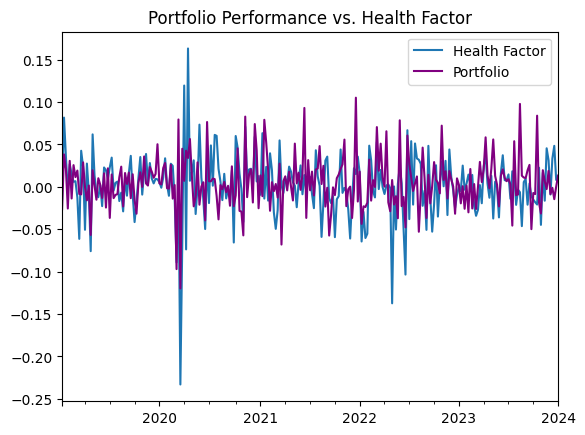

In [201]:
data_sec['Hlth '].plot(label='Health Factor')
data_sec['Portfolio weekly returns'].plot(color='purple', label='Portfolio')
plt.title('Portfolio Performance vs. Health Factor')
plt.legend()
plt.show()

At first glance, we see that the healthcare factor is somewhat more volatile than the portfolio during certain periods, especially during the COVID pandemic and the Federal Reserve’s interest rate hikes, with very sharp declines. However, upon closer inspection, we can identify events that may explain this divergence. For example, in May 2022, during the Fed’s rate hike, the healthcare factor dropped drastically while LLY (the main component of our portfolio) held up quite well. This resilience was mainly due to the upcoming launch of a new essential drug for diabetic patients (Mounjaro), which had not yet been commercialized, but was outperforming existing treatments. Consequently, the market had very high expectations for it.

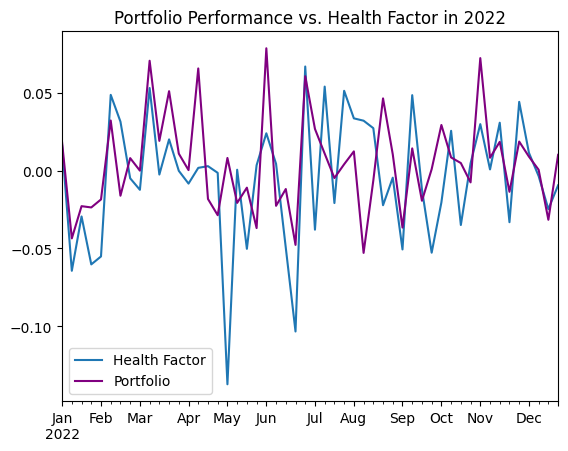

In [202]:
data_sec['Hlth '].loc['2022'].plot(label='Health Factor')
data_sec['Portfolio weekly returns'].loc['2022'].plot(color='purple', label='Portfolio')
plt.title('Portfolio Performance vs. Health Factor in 2022')
plt.legend()
plt.show()

Similarly, in August 2023, there were reports of a 28% increase in LLY’s sales for the three months ending June 2023 compared to the previous year. These significant results were clearly reflected in the performance of our portfolio relative to the healthcare factor. The factor declined mainly due to the success of GLP-1 type drugs (including LLY’s Mounjaro), which are very popular for treating obesity and diabetes. This led to a rapid drop in the stock prices of competitors who did not market this variant, as well as healthcare suppliers.

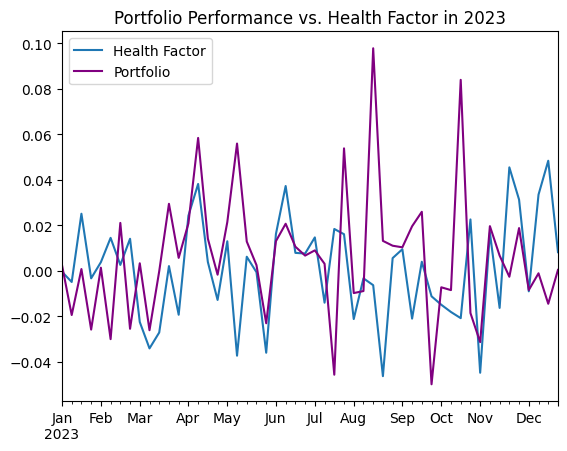

In [203]:
data_sec['Hlth '].loc['2023'].plot(label='Health Factor')
data_sec['Portfolio weekly returns'].loc['2023'].plot(color='purple', label='Portfolio')
plt.title('Portfolio Performance vs. Health Factor in 2023')
plt.legend()
plt.show()

# **BACKTESTING**

For the bull market period, we will select the dates from September 2020 to September 2021.

<Axes: xlabel='Date'>

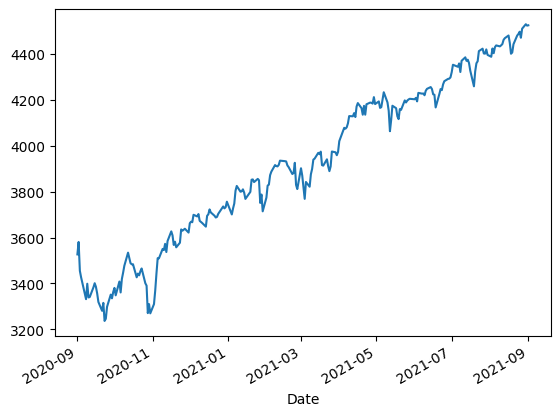

In [204]:
prices_sp500.loc['2020-09-01': '2021-09-01'].plot()

In [205]:
data_beta_bull = beta_data.loc['2020-09-01': '2021-09-01']


In [206]:
X = data_beta_bull['SP500 returns']
y = data_beta_bull['Portfolio weekly returns']
X_sm = sm.add_constant(X)
modelo = sm.OLS(y, X_sm).fit()
print(modelo.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.115
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     6.650
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):             0.0128
Time:                              09:02:43   Log-Likelihood:                 109.23
No. Observations:                        53   AIC:                            -214.5
Df Residuals:                            51   BIC:                            -210.5
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

We can see that the S&P 500 returns explain 11.5% of the fund's returns, and that our fund has a beta of 0.6 relative to the S&P 500.

In [207]:
data_ff_bull = data_ff.loc['2020-09-01': '2021-09-01']

In [208]:
X = data_ff_bull[["Mkt-RF", "SMB", "HML"]]
Y = data_ff_bull.loc[:, "Portfolio weekly returns"] - datos_ff_bull["RF"]

X_sm = sm.add_constant(X)

model = sm.OLS(Y, X_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.363
Date:                Mon, 02 Jun 2025   Prob (F-statistic):             0.0826
Time:                        09:02:43   Log-Likelihood:                 109.56
No. Observations:                  53   AIC:                            -211.1
Df Residuals:                      49   BIC:                            -203.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.005      1.189      0.2

We observe an explanatory power of 7.3%, but none of the factors are statistically significant.

In [209]:
data_sec_bull = data_sec.loc['2020-09-01': '2021-09-01']

In [210]:
X = data_sec_bull[['Rtail', 'Hlth ', 'Drugs', 'Aero ', 'Smoke']]
Y = data_sec_bull.loc[:, "Portfolio weekly returns"]

X_sm = sm.add_constant(X)

model = sm.OLS(Y, X_sm).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.499
Model:                                  OLS   Adj. R-squared:                  0.446
Method:                       Least Squares   F-statistic:                     9.370
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):           3.04e-06
Time:                              09:02:43   Log-Likelihood:                 124.30
No. Observations:                        53   AIC:                            -236.6
Df Residuals:                            47   BIC:                            -224.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

We can see that, in this case, the factor returns explain 44.6% of our portfolio's returns. Our portfolio has a beta of 1.32 with respect to the pharmaceutical sector, meaning that when the sector rises by 1%, our portfolio is expected to move by 1.32%.

For the bear market period, we will select the dates from December 2021 to December 2022.

<Axes: xlabel='Date'>

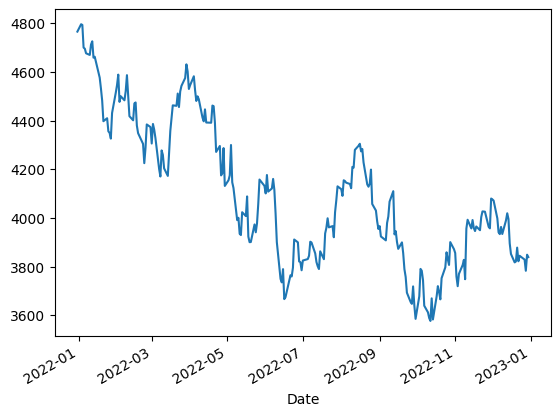

In [211]:
prices_sp500.loc['2021-12-31': '2022-12-31'].plot()

In [212]:
data_beta_bear = pd.concat([weekly_returns_sp500.loc['2021-12-31': '2022-12-31'], weekly_portfolio_returns.loc['2021-12-31': '2022-12-31']], join = 'inner', axis = 1)
data_beta_bear.columns = ['SP500 returns', 'Portfolio weekly returns']
data_beta_bear.head()

,SP500 returns,Portfolio weekly returns
Date,,
2022-01-05,0.011140,0.017988
2022-01-12,-0.017453,-0.043607
2022-01-19,-0.007914,-0.022902
2022-01-26,-0.038575,-0.023725
2022-02-02,-0.035471,-0.018581


In [213]:

X = data_beta_bear['SP500 returns']
y = data_beta_bear['Portfolio weekly returns']
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.264
Model:                                  OLS   Adj. R-squared:                  0.249
Method:                       Least Squares   F-statistic:                     17.93
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):           9.82e-05
Time:                              09:02:43   Log-Likelihood:                 115.53
No. Observations:                        52   AIC:                            -227.1
Df Residuals:                            50   BIC:                            -223.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Since the p-value is less than 0.05 for the S&P 500 returns variable, we can conclude that its beta is statistically significant. Therefore, if the market rises by 1%, our portfolio is expected to increase by 0.51%.

In [214]:
data_ff_bear = data_ff.loc['2021-12-31': '2022-12-31']
X = data_ff_bear[["Mkt-RF", "SMB", "HML", "RF"]]
Y = data_ff_bear.loc[:, "Portfolio weekly returns"] - data_ff_bear["RF"]
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.175
Date:                Mon, 02 Jun 2025   Prob (F-statistic):            0.00565
Time:                        09:02:43   Log-Likelihood:                 115.46
No. Observations:                  52   AIC:                            -220.9
Df Residuals:                      47   BIC:                            -211.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.005      1.349      0.1

Since the p-value is greater than 0.05 for all factors except for Mkt-RF, we can conclude that only the beta of this factor is statistically significant. As it is greater than zero, we observe that our portfolio would move less aggressively than the market.

In [215]:
data_sec_bear = pd.concat([returns_sector_factors.loc['2021-12-31': '2022-12-31'], weekly_portfolio_returns.loc['2021-12-31': '2022-12-31']], join = 'inner', axis = 1)
X = data_sec_bear[['Rtail', 'Hlth ', 'Drugs', 'Aero ', 'Smoke']]
Y = data_sec_bear.loc[:, "Portfolio weekly returns"]
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Portfolio weekly returns   R-squared:                       0.677
Model:                                  OLS   Adj. R-squared:                  0.642
Method:                       Least Squares   F-statistic:                     19.30
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):           2.63e-10
Time:                              09:02:43   Log-Likelihood:                 136.95
No. Observations:                        52   AIC:                            -261.9
Df Residuals:                            46   BIC:                            -250.2
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Since the p-value is greater than 0.05 for all factors except for Drugs, we can conclude that only the Drugs factor is statistically significant. This indicates that, according to the regression, our portfolio behaves very similarly to the pharmaceutical sector, with a beta close to one (1.13).


COMPARISON BETWEEN EXPECTED RETURN AND RISK AFTER OPTIMIZATION AND BEAR AND BULL MARKETS WITH THE OBTAINED OPTIMIZED WEIGHTS.

In [216]:
real_returns_bull = rentabilidad_semanal_cartera['2020-09-01':'2021-09-01'].mean() * 52
real_returns_bear = rentabilidad_semanal_cartera['2021-12-31':'2022-12-31'].mean() * 52
real_std_bull = rentabilidad_semanal_cartera['2020-09-01':'2021-09-01'].std() * np.sqrt(52)
real_std_bear = rentabilidad_semanal_cartera['2021-12-31':'2022-12-31'].std() * np.sqrt(52)
print(f'Bull market returns: {real_returns_bull}, Bull market std: {real_std_bull}')
print(f'Bear market returns: {real_returns_bear}, Bear market std: {real_std_bear}')

Bull market returns: 0.42908311383015263, Bull market std: 0.23850092182013743
Bear market returns: 0.23087089007599748, Bear market std: 0.22266836655169728


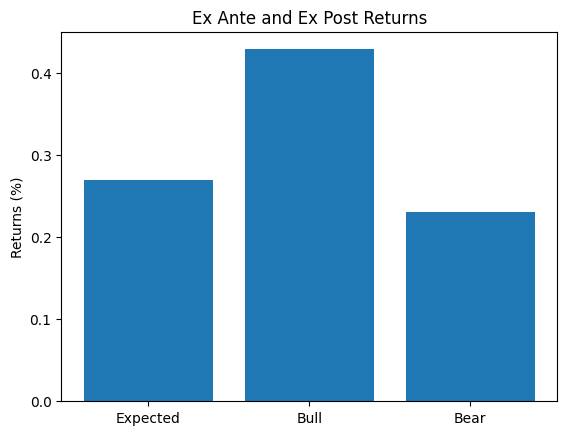

In [217]:
labels = ['Expected', 'Bull', 'Bear']
values = [portfolio_returns, real_returns_bull, real_returns_bear]
plt.bar(labels, values)
plt.title('Ex Ante and Ex Post Returns')
plt.ylabel('Returns (%)')
plt.show()


We can see that the expected return of our portfolio is closer to the actual performance during bear market periods, while in bull markets, its results have surged, achieving a return of 42%—almost double.

# **Montecarlo Value at Risk**

We used the Black-Scholes-Merton framework for the next 30 days and generated 100,000 random numbers following a N(0,1) distribution to perform the simulations.
We assumed that the initial price should be the current price as of today, April 21, calculated using the optimized weights, current prices, and the returns and volatility estimated during the optimization process.

In [218]:
var_prices = yf.download(tickers, start = "2025-04-21", end = "2025-04-22", auto_adjust = True)['Close']
var_prices

[*********************100%***********************]  8 of 8 completed


Ticker,ABBV,COST,KR,LLY,LMT,MO,UNH,WMT
Date,,,,,,,,
2025-04-21,170.160004,956.523743,71.961205,816.34668,458.329987,57.630001,425.329987,92.187111


In [219]:

initial_price = (optimal_weights @ var_prices.T).to_numpy()
returns_var = portfolio_returns
volatility = portfolio_std
days = 30
num_simulations = 100000

time = days / 365


simulations = initial_price * np.exp((returns_var - 0.5 * volatility ** 2) * time
                                       + volatility * np.sqrt(time) * np.random.standard_normal(num_simulations))

ordered_returns = np.sort(simulations - initial_price)


In [220]:
var_95 = np.percentile(ordered_returns, 5)
print(f'The monthly Value at Risk for our portfolio at a 95% confidence level is: {var_95}')

The monthly Value at Risk for our portfolio at a 95% confidence level is: -52.24722003629606


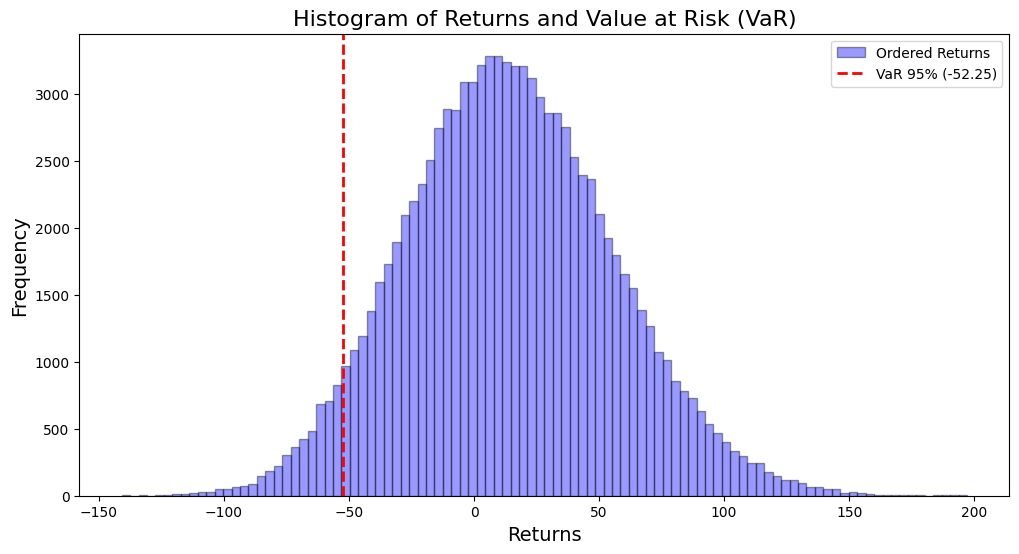

In [221]:
plt.figure(figsize=(12, 6))
plt.hist(ordered_returns, bins=100, color='blue', alpha=0.4, edgecolor='black', label='Ordered Returns')


plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f'VaR 95% ({var_95:.2f})')


plt.title('Histogram of Returns and Value at Risk (VaR)', fontsize=16)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.legend()


plt.show()